In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import time

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import MinMaxScaler

# Data Pre-processing

df1

In [ ]:
# Read cases_malaysia.csv from url
url1 = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'
df1 = pd.read_csv(url1)

In [ ]:
# Display the (Rows, Columns) of the dataset
df1.shape

(1681, 31)

In [ ]:
# Display first few rows of the dataset
df1.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,4,0,4,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,0,0,0,4,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,3,3,0,7,0,3,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check for null values
print(df1.isnull().sum())

date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             513
cluster_religious          513
cluster_community          513
cluster_highRisk           513
cluster_education          513
cluster_detentionCentre    513
cluster_workplace          513
dtype: int64


In [ ]:
# Info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1681 non-null   object 
 1   cases_new                1681 non-null   int64  
 2   cases_import             1681 non-null   int64  
 3   cases_recovered          1681 non-null   int64  
 4   cases_active             1681 non-null   int64  
 5   cases_cluster            1681 non-null   int64  
 6   cases_unvax              1681 non-null   int64  
 7   cases_pvax               1681 non-null   int64  
 8   cases_fvax               1681 non-null   int64  
 9   cases_boost              1681 non-null   int64  
 10  cases_child              1681 non-null   int64  
 11  cases_adolescent         1681 non-null   int64  
 12  cases_adult              1681 non-null   int64  
 13  cases_elderly            1681 non-null   int64  
 14  cases_0_4               

In [ ]:
# Drop columns by name
df1 = df1.drop(columns=['cluster_import', 'cluster_religious', 'cluster_community', 'cluster_highRisk', 'cluster_education', 'cluster_detentionCentre', 'cluster_workplace'])

In [ ]:
# Display the (Rows, Columns) of the dataset
df1.shape

(1681, 24)

In [ ]:
# Display first few rows of the dataset
df1.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020-01-25,4,4,0,4,0,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2020-01-26,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-27,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-28,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-29,3,3,0,7,0,3,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [ ]:
# Check for null values
print(df1.isnull().sum())

date                0
cases_new           0
cases_import        0
cases_recovered     0
cases_active        0
cases_cluster       0
cases_unvax         0
cases_pvax          0
cases_fvax          0
cases_boost         0
cases_child         0
cases_adolescent    0
cases_adult         0
cases_elderly       0
cases_0_4           0
cases_5_11          0
cases_12_17         0
cases_18_29         0
cases_30_39         0
cases_40_49         0
cases_50_59         0
cases_60_69         0
cases_70_79         0
cases_80            0
dtype: int64


df2

In [ ]:
# Read file from url
url2 = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/hospital.csv'
df2 = pd.read_csv(url2)

In [ ]:
# Display the (Rows, Columns) of the dataset
df2.shape

(25471, 14)

In [ ]:
# Display first few rows of the dataset
df2.head()

,date,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
0,2020-03-24,Johor,1440,434,1408,0,0,0,0,0,0,18,9,1
1,2020-03-24,Kedah,1218,143,1183,0,0,0,0,0,0,46,5,12
2,2020-03-24,Kelantan,1463,280,1424,9,6,15,1,0,1,78,58,23
3,2020-03-24,Melaka,1091,82,1065,0,0,0,0,0,0,19,10,12
4,2020-03-24,Negeri Sembilan,1223,253,1205,0,0,0,0,0,0,90,13,8


In [ ]:
# Check for null values
print(df2.isnull().sum())

date                0
state               0
beds                0
beds_covid          0
beds_noncrit        0
admitted_pui        0
admitted_covid      0
admitted_total      0
discharged_pui      0
discharged_covid    0
discharged_total    0
hosp_covid          0
hosp_pui            0
hosp_noncovid       0
dtype: int64


In [ ]:
# Info of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25471 entries, 0 to 25470
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              25471 non-null  object
 1   state             25471 non-null  object
 2   beds              25471 non-null  int64 
 3   beds_covid        25471 non-null  int64 
 4   beds_noncrit      25471 non-null  int64 
 5   admitted_pui      25471 non-null  int64 
 6   admitted_covid    25471 non-null  int64 
 7   admitted_total    25471 non-null  int64 
 8   discharged_pui    25471 non-null  int64 
 9   discharged_covid  25471 non-null  int64 
 10  discharged_total  25471 non-null  int64 
 11  hosp_covid        25471 non-null  int64 
 12  hosp_pui          25471 non-null  int64 
 13  hosp_noncovid     25471 non-null  int64 
dtypes: int64(12), object(2)
memory usage: 2.7+ MB


In [ ]:
# Group by the 'date' feature and sum the other features
df2_new = df2.groupby('date').sum().reset_index()

df2_new = df2_new.drop(columns=['state'])

# Save the resulting dataset to a new CSV file
df2_new.to_csv('hospital_malaysia.csv', index=False)

In [ ]:
# Display the (Rows, Columns) of the dataset
df2_new.shape

(1618, 13)

In [ ]:
# Display first few rows of the dataset
df2_new.head()

,date,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
0,2020-03-24,19457,3587,18908,14,22,36,1,25,26,1019,353,357
1,2020-03-25,19419,3611,18857,101,110,211,61,22,83,1229,547,249
2,2020-03-26,19627,3819,19065,81,89,170,40,31,71,1347,432,7407
3,2020-03-27,19627,3819,19065,132,99,231,52,54,106,1422,480,7691
4,2020-03-28,21118,3969,20474,116,156,272,62,84,146,1491,568,8324


In [ ]:
# Check for null values
print(df2_new.isnull().sum())

date                0
beds                0
beds_covid          0
beds_noncrit        0
admitted_pui        0
admitted_covid      0
admitted_total      0
discharged_pui      0
discharged_covid    0
discharged_total    0
hosp_covid          0
hosp_pui            0
hosp_noncovid       0
dtype: int64


In [ ]:
# Info of the dataset
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1618 non-null   object
 1   beds              1618 non-null   int64 
 2   beds_covid        1618 non-null   int64 
 3   beds_noncrit      1618 non-null   int64 
 4   admitted_pui      1618 non-null   int64 
 5   admitted_covid    1618 non-null   int64 
 6   admitted_total    1618 non-null   int64 
 7   discharged_pui    1618 non-null   int64 
 8   discharged_covid  1618 non-null   int64 
 9   discharged_total  1618 non-null   int64 
 10  hosp_covid        1618 non-null   int64 
 11  hosp_pui          1618 non-null   int64 
 12  hosp_noncovid     1618 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 164.5+ KB


combined df

In [ ]:
# Combine df1 and df2_new as df
df = pd.merge(df1, df2_new, on='date')

# Save the combined dataset to a CSV file
df.to_csv('malaysia_covid19_dataset.csv', index=False)

In [ ]:
# Display the (Rows, Columns) of the dataset
df.shape

(1618, 36)

In [ ]:
# Display first few rows of the dataset
df.head()

,date,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
0,2020-03-24,106,19,24,1423,69,106,0,0,0,...,18908,14,22,36,1,25,26,1019,353,357
1,2020-03-25,172,35,16,1576,114,172,0,0,0,...,18857,101,110,211,61,22,83,1229,547,249
2,2020-03-26,235,27,16,1790,154,235,0,0,0,...,19065,81,89,170,40,31,71,1347,432,7407
3,2020-03-27,130,19,44,1874,68,130,0,0,0,...,19065,132,99,231,52,54,106,1422,480,7691
4,2020-03-28,159,22,61,1966,102,159,0,0,0,...,20474,116,156,272,62,84,146,1491,568,8324


In [ ]:
# Check for null values
print(df.isnull().sum())

date                0
cases_new           0
cases_import        0
cases_recovered     0
cases_active        0
cases_cluster       0
cases_unvax         0
cases_pvax          0
cases_fvax          0
cases_boost         0
cases_child         0
cases_adolescent    0
cases_adult         0
cases_elderly       0
cases_0_4           0
cases_5_11          0
cases_12_17         0
cases_18_29         0
cases_30_39         0
cases_40_49         0
cases_50_59         0
cases_60_69         0
cases_70_79         0
cases_80            0
beds                0
beds_covid          0
beds_noncrit        0
admitted_pui        0
admitted_covid      0
admitted_total      0
discharged_pui      0
discharged_covid    0
discharged_total    0
hosp_covid          0
hosp_pui            0
hosp_noncovid       0
dtype: int64


In [ ]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1618 non-null   object
 1   cases_new         1618 non-null   int64 
 2   cases_import      1618 non-null   int64 
 3   cases_recovered   1618 non-null   int64 
 4   cases_active      1618 non-null   int64 
 5   cases_cluster     1618 non-null   int64 
 6   cases_unvax       1618 non-null   int64 
 7   cases_pvax        1618 non-null   int64 
 8   cases_fvax        1618 non-null   int64 
 9   cases_boost       1618 non-null   int64 
 10  cases_child       1618 non-null   int64 
 11  cases_adolescent  1618 non-null   int64 
 12  cases_adult       1618 non-null   int64 
 13  cases_elderly     1618 non-null   int64 
 14  cases_0_4         1618 non-null   int64 
 15  cases_5_11        1618 non-null   int64 
 16  cases_12_17       1618 non-null   int64 
 17  cases_18_29   

Select 6 months date range

In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Set the start date and the end date
start_date = '2021-11-01'
end_date = '2022-05-01'

# Filter the DataFrame to include only the rows within the specified date range
df = df.loc[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [ ]:
# Drop columns
df = df.drop(columns=['cases_new', 'cases_import', 'cases_cluster', 'cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly','cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80', 'beds', 'beds_covid', 'beds_noncrit', 'admitted_pui','admitted_total', 'discharged_pui', 'discharged_total', 'hosp_pui','hosp_noncovid'])

In [ ]:
# Display first few rows of the dataset
df.head()

,date,cases_recovered,cases_active,cases_unvax,cases_pvax,cases_fvax,cases_boost,admitted_covid,discharged_covid,hosp_covid
587,2021-11-01,5299,67236,1186,159,3257,24,589,614,4655
588,2021-11-02,5372,66865,1314,182,3539,36,698,710,4685
589,2021-11-03,4947,67163,1361,175,3718,37,664,624,4677
590,2021-11-04,5865,66947,1444,156,4060,53,700,675,4580
591,2021-11-05,5579,66243,1198,115,3564,45,560,593,4613


In [ ]:
# Check for outliers
for feature in df.columns:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature].tolist()
  print(f"Outliers for '{feature}': {outliers}")

df.shape

Outliers for 'date': []
Outliers for 'cases_recovered': []
Outliers for 'cases_active': []
Outliers for 'cases_unvax': [5626]
Outliers for 'cases_pvax': []
Outliers for 'cases_fvax': [8545, 9222, 10124, 10831, 9770, 10400, 10387, 12932, 12307, 12595, 12815, 11771, 10935, 11773, 12932, 13059, 12260, 10491, 9221, 8511, 9419, 9700, 11485, 10963, 10846, 8670, 8778, 9771, 9086, 9081, 9106]
Outliers for 'cases_boost': []
Outliers for 'admitted_covid': [1816, 1763, 1773, 1834, 2047, 1994, 2020, 1871, 1965, 1906, 2040, 2130, 1865, 1762, 1783]
Outliers for 'discharged_covid': [1454, 1423, 1546, 1517, 1523, 1481, 1692, 1675, 1625, 1611, 1594, 1543, 1498, 1610, 1555, 1545]
Outliers for 'hosp_covid': []


(182, 10)

# Data Splitting

In [ ]:
# Feature dropping, includes all features except for the targeted feature
# 'date' is the identifier
# 'cases recovered' is the target
X = df.drop(['date', 'cases_recovered'], axis=1)
y = df['cases_recovered']

# Split the data into training, validation, and testing sets(60% - Training, 20% Validation, 20% Testing)
# Testing size = 40% and the remaining 60% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

# Validation size = 20% and the remaining 20% for testing (60% of overall for training set )
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [ ]:
X_train

,cases_active,cases_unvax,cases_pvax,cases_fvax,cases_boost,admitted_covid,discharged_covid,hosp_covid
614,66456,1030,32,3085,92,538,436,3798
719,320883,3206,501,6043,12785,1762,1368,7508
591,66243,1198,115,3564,45,560,593,4613
619,62487,1312,46,4044,149,602,609,3972
665,40767,627,15,2203,400,276,327,1884
...,...,...,...,...,...,...,...,...
693,182971,3993,100,10387,7653,1355,934,5290
601,65959,1269,65,3746,63,623,599,4610
679,57155,1143,19,3099,1305,431,303,2189
766,50302,259,83,519,1718,131,188,750


In [ ]:
# Perform Scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# K-Nearest Neighbour

In [ ]:
# Create a list of values for K
k_values = [i for i in range(1, 20)]
scores = []

# Loop through different K values
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    scores.append(mean_squared_log_error(y_test, pred))

# Get the best k and train KNN
best_k = k_values[scores.index(min(scores))]
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Print best k value
print("Best K value: ", best_k)

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Storage for error values
error_df = []

# Append the error into a list as a DataFrame
error_df.append(pd.Series({
    'train': mean_squared_log_error(y_train, y_train_pred),
    'test': mean_squared_log_error(y_test, y_test_pred)
}, name='mean_sq_log_error'))

# Convert list of Series to DataFrame
error_df = pd.DataFrame(error_df)

# Display the error dataframe
print(error_df)

Best K value:  6
                      train      test
mean_sq_log_error  0.017065  0.019292


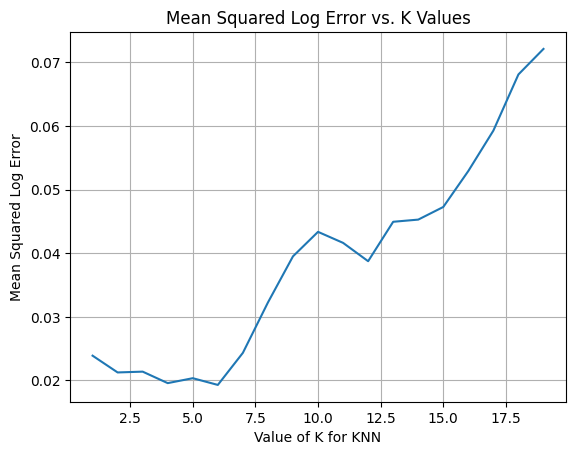

In [ ]:
# Plot the error
plt.plot(k_values, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Log Error')
plt.title('Mean Squared Log Error vs. K Values')
plt.grid(True)
plt.show()

In [ ]:
# Initialize the KNN classifier with k=6
knn = KNeighborsRegressor(n_neighbors=6)
# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [ ]:
# Make predictions on the validation set
y_val_pred = knn.predict(X_val)

# Evaluate the model on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print validation results
print(f'Validation Mean Squared Error (MSE): {val_mse}')
print(f'R-squared value (R2): {val_r2}')

Validation Mean Squared Error (MSE): 5329023.042042042
R-squared value (R2): 0.9240890927004024


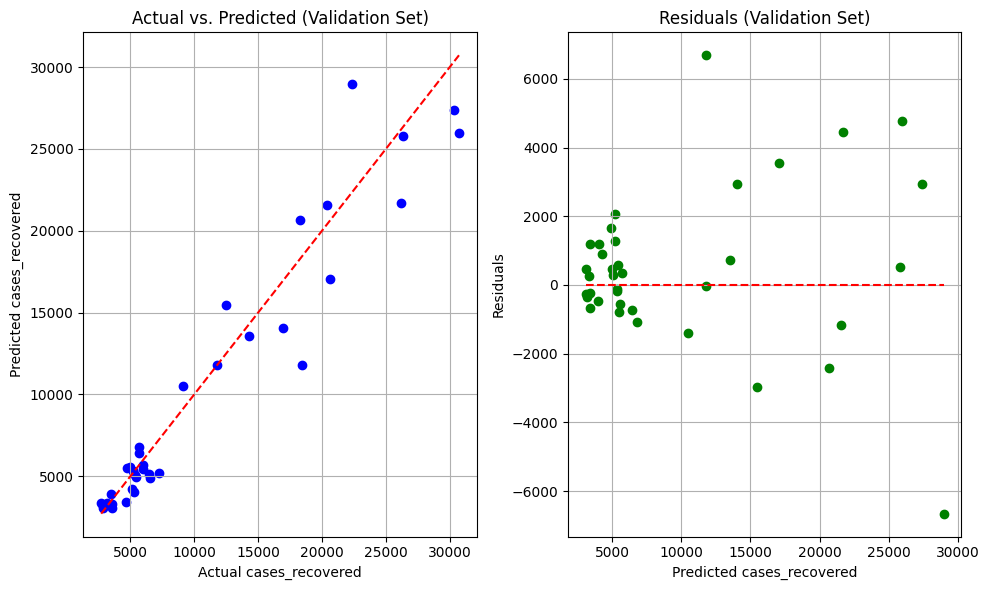

In [ ]:
# Plotting Actual vs. Predicted values for the validation set
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, color='blue')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.title('Actual vs. Predicted (Validation Set)')
plt.xlabel('Actual cases_recovered')
plt.ylabel('Predicted cases_recovered')
plt.grid(True)

# Plotting Residuals for the validation set
plt.subplot(1, 2, 2)
residuals = y_val - y_val_pred
plt.scatter(y_val_pred, residuals, color='green')
plt.hlines(y=0, xmin=min(y_val_pred), xmax=max(y_val_pred), color='red', linestyle='--')
plt.title('Residuals (Validation Set)')
plt.xlabel('Predicted cases_recovered')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test set
y_test_pred = knn.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print test results
print(f'Test Mean Squared Error (MSE): {test_mse}')
print(f'R-squared value (R2): {test_r2}')

Test Mean Squared Error (MSE): 4239996.101080246
R-squared value (R2): 0.9497647939880811


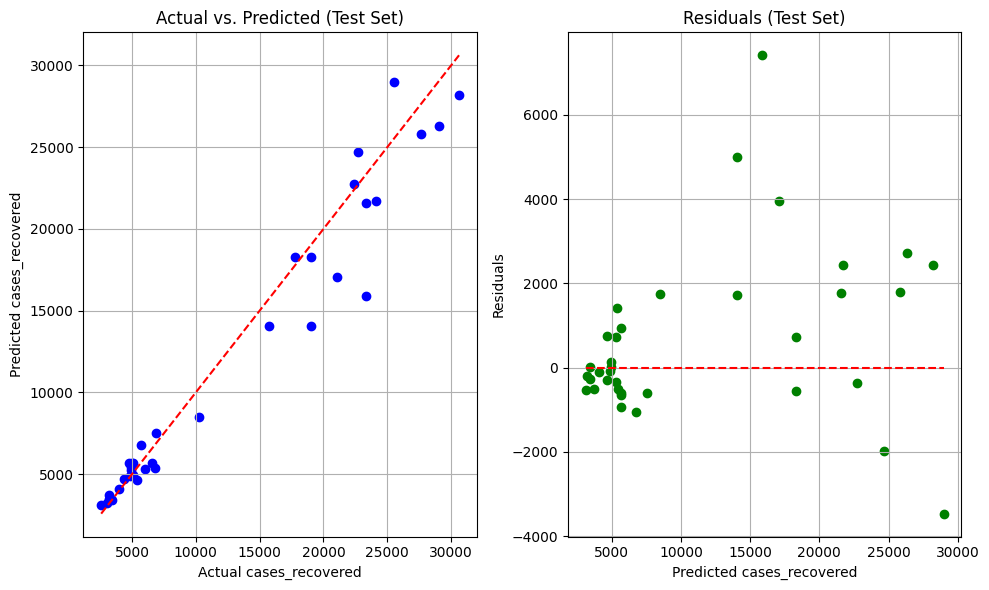

In [ ]:
# Plotting Actual vs. Predicted values for the test set
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted (Test Set)')
plt.xlabel('Actual cases_recovered')
plt.ylabel('Predicted cases_recovered')
plt.grid(True)

# Plotting Residuals for the test set
plt.subplot(1, 2, 2)
residuals_test = y_test - y_test_pred
plt.scatter(y_test_pred, residuals_test, color='green')
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), color='red', linestyle='--')
plt.title('Residuals (Test Set)')
plt.xlabel('Predicted cases_recovered')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

# Random Forest Regressor

In [ ]:
# Initial the model
model_rfr = RandomForestRegressor()

# Define parameters grid for hyperparameter tuning
param_grid = {
    "n_estimators": [100, 200, 300], # number of trees in the forest
    "max_depth": [None, 10, 20, 30], # maximum depth of each tree
    'criterion': ['squared_error', 'absolute_error'] # the function to measure the quality of split
}

grid_search = GridSearchCV(model_rfr, param_grid, cv=5, scoring="neg_mean_squared_error")

# Train the model with training data
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'criterion': 'absolute_error', 'max_depth': None, 'n_estimators': 300}


In [ ]:
best_rfr_model = grid_search.best_estimator_

y_val_pred_rfr = best_rfr_model.predict(X_val)

# Mean Squared Error
mse_rfr_val = mean_squared_error(y_val, y_val_pred_rfr)
# R-squared
r2_rfr_val = r2_score(y_val, y_val_pred_rfr)

print(f"Validation MSE: {mse_rfr_val}")
print(f"Validation R Squared Score: {r2_rfr_val}")

Validation MSE: 3374220.5214273278
Validation R Squared Score: 0.9519348782713616


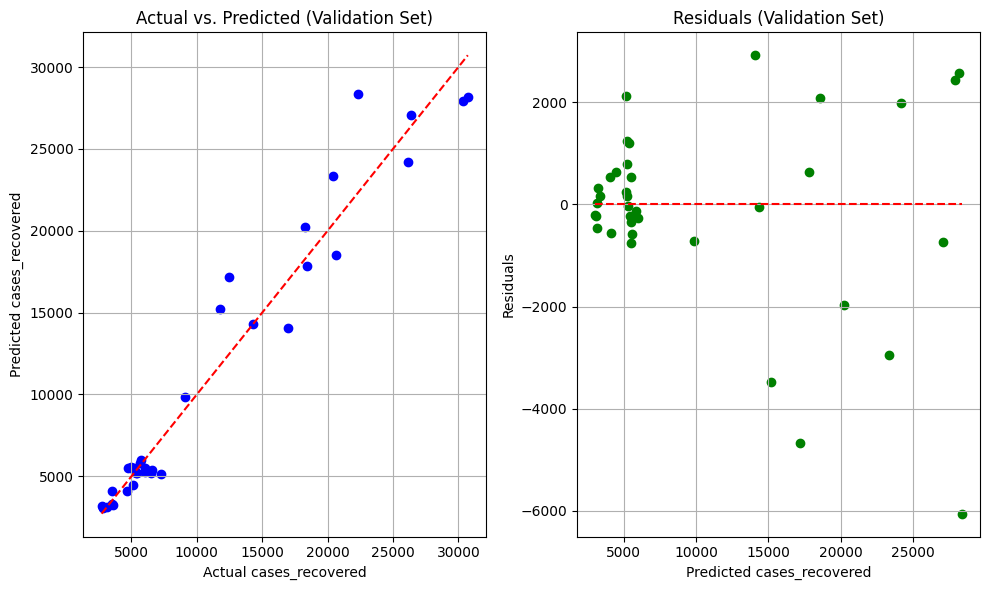

In [ ]:
# Plotting Actual vs. Predicted values for the validation set
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred_rfr, color='blue')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.title('Actual vs. Predicted (Validation Set)')
plt.xlabel('Actual cases_recovered')
plt.ylabel('Predicted cases_recovered')
plt.grid(True)

# Plotting Residuals for the validation set
plt.subplot(1, 2, 2)
residuals_rfr_val = y_val - y_val_pred_rfr
plt.scatter(y_val_pred_rfr, residuals_rfr_val, color='green')
plt.hlines(y=0, xmin=min(y_val_pred_rfr), xmax=max(y_val_pred_rfr), color='red', linestyle='--')
plt.title('Residuals (Validation Set)')
plt.xlabel('Predicted cases_recovered')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Predict on the test set
y_test_pred_rfr = best_rfr_model.predict(X_test)

# Mean Squared Error
mse_test_rfr = mean_squared_error(y_test, y_test_pred_rfr)
# R-squared
r2_test_rfr = r2_score(y_test, y_test_pred_rfr)

print(f"Test MSE: {mse_test_rfr}")
print(f"Test R Squared Score: {r2_test_rfr}")

Test MSE: 5378016.136577779
Test R Squared Score: 0.936281604483651


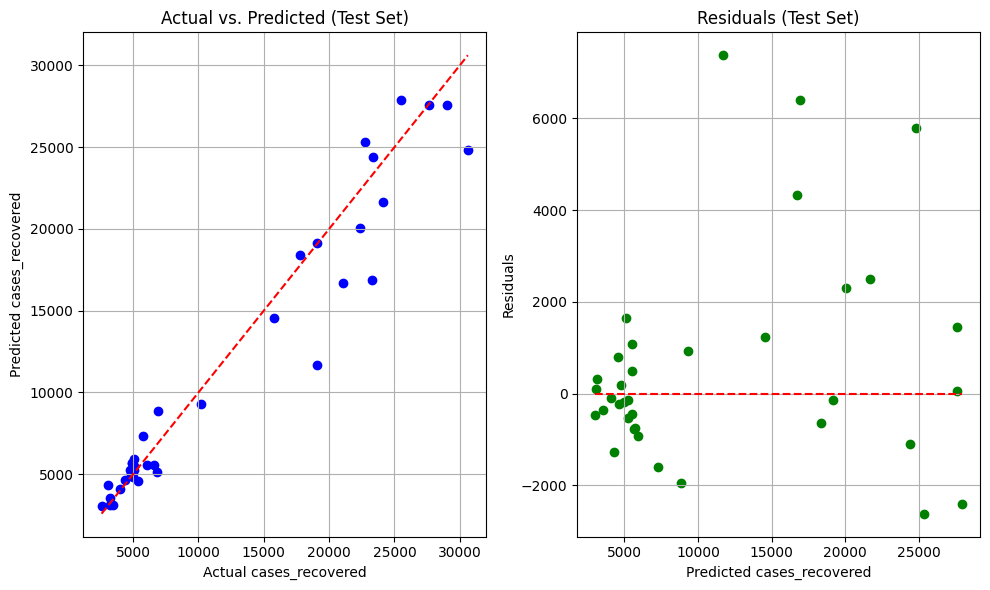

In [ ]:
# Plotting Actual vs. Predicted values for the validation set
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_rfr, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted (Test Set)')
plt.xlabel('Actual cases_recovered')
plt.ylabel('Predicted cases_recovered')
plt.grid(True)

# Plotting Residuals for the validation set
plt.subplot(1, 2, 2)
residuals_rfr_test = y_test - y_test_pred_rfr
plt.scatter(y_test_pred_rfr, residuals_rfr_test, color='green')
plt.hlines(y=0, xmin=min(y_test_pred_rfr), xmax=max(y_test_pred_rfr), color='red', linestyle='--')
plt.title('Residuals (Test Set)')
plt.xlabel('Predicted cases_recovered')
plt.ylabel('Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

# Linear Regression

In [ ]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
# Mean Squared Error
mse = mean_squared_error(y_val, y_val_pred)
# R-squared
r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse}")
print(f"Validation R Squared Score: {r2}")

Validation MSE: 4828778.497835731
Validation R Squared Score: 0.9312149799264077


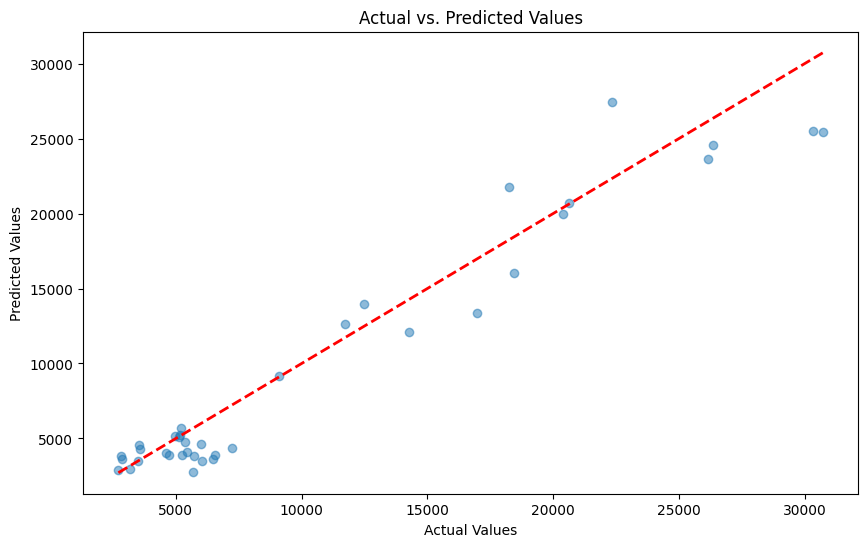

In [ ]:
# Scatter Plot of Actual vs Predicted (Validation)
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', lw=2)  # Line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


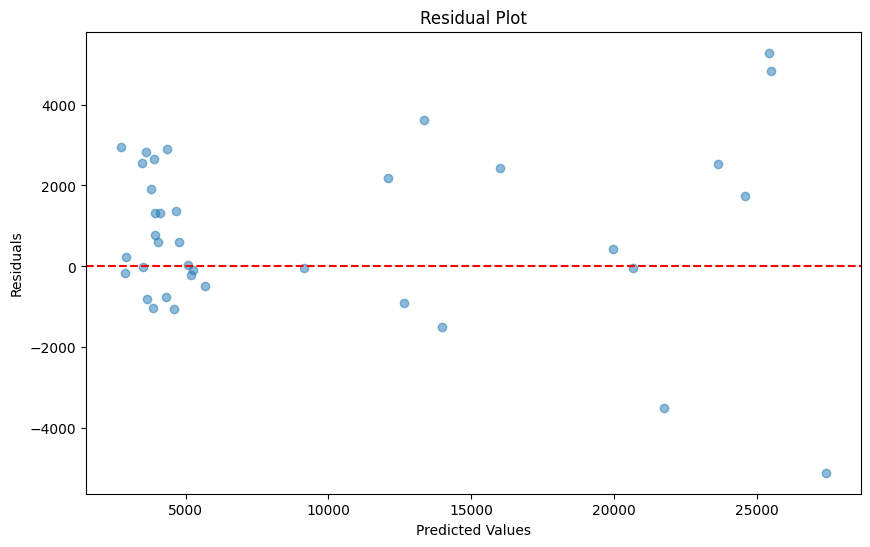

In [ ]:
# Residual Plot
residuals = y_val - y_val_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Optionally, evaluate on the test set
# Mean Squared Error
mse_test = mean_squared_error(y_test, y_test_pred)
# R-squared
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test R Squared Score: {r2_test}")

Test MSE: 4104551.445653979
Test R Squared Score: 0.9513695337110301


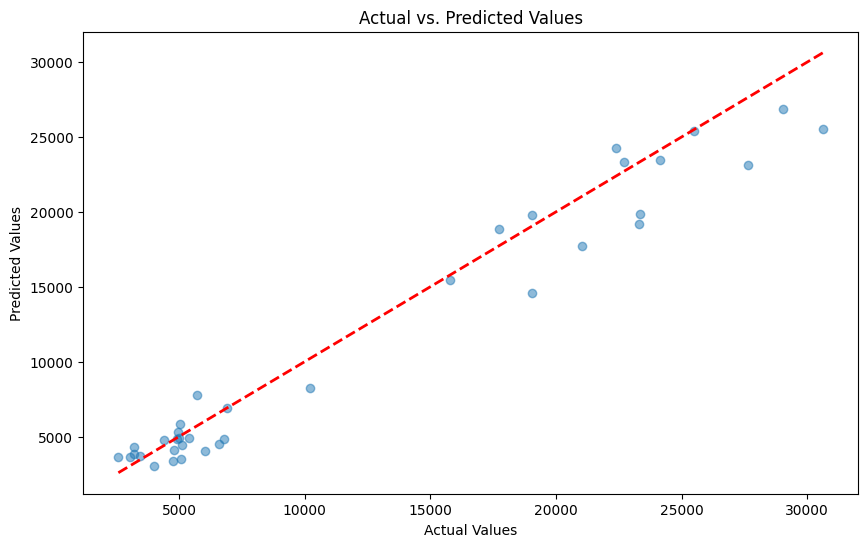

In [ ]:
# Scatter Plot of Actual vs Predicted (Testing)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Line for perfect predictions
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


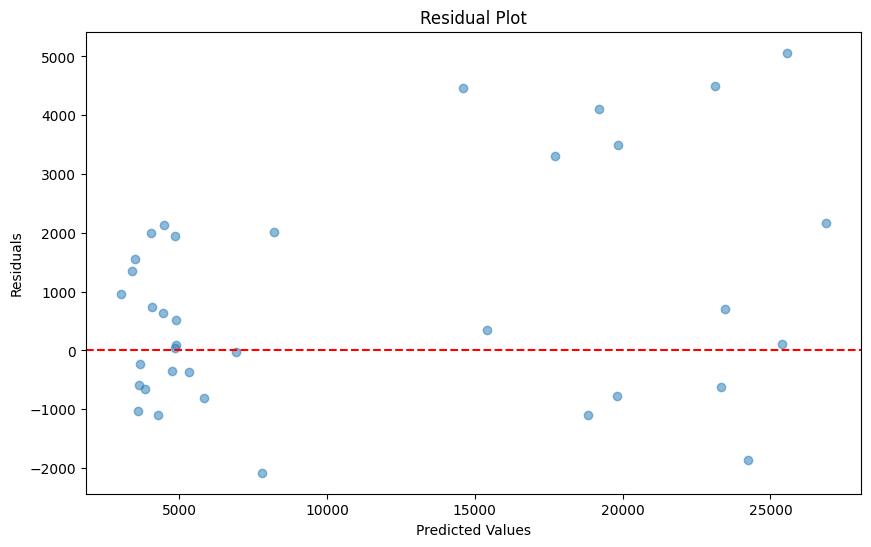

In [ ]:
# Residual Plot
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Neural Network

In [ ]:
# Define the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Measure the training time
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=500,
                    batch_size=32,
                    verbose=1)

end_time = time.time()
training_duration = end_time - start_time
print(f"Training Time: {training_duration} seconds")

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 220150288.0000 - mse: 220150288.0000 - val_loss: 181223616.0000 - val_mse: 181223616.0000
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 175414448.0000 - mse: 175414448.0000 - val_loss: 181214352.0000 - val_mse: 181214352.0000
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 184094272.0000 - mse: 184094272.0000 - val_loss: 181204848.0000 - val_mse: 181204848.0000
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 206273424.0000 - mse: 206273424.0000 - val_loss: 181194976.0000 - val_mse: 181194976.0000
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 206331968.0000 - mse: 206331968.0000 - val_loss: 181184832.0000 - val_mse: 181184832.0000
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 228036720.0000 - mse: 228036720.0000 - val_loss: 181173296.0000 - val_mse: 181173296.0000
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 222298368.0000 - mse: 222298368.0000 - val_loss: 18116

In [ ]:
# Evaluate the model on the test set
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {test_mse}")

Test MSE: 7176417.5


In [ ]:
# Predict on the test set
y_test_pred_nn = model.predict(X_test)
r2 = r2_score(y_test, y_test_pred_nn)
print(f"R^2 Score: {r2}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
R^2 Score: 0.914974261002846


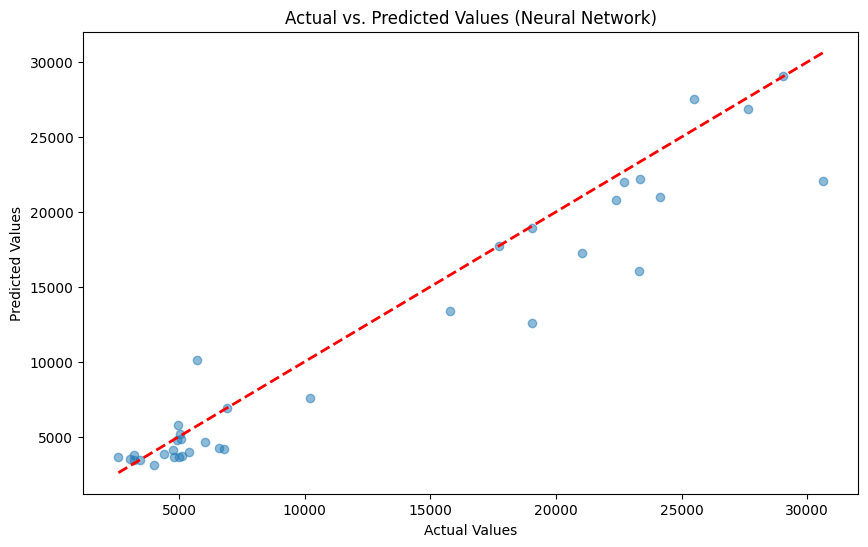

In [ ]:
# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_nn, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Neural Network)')
plt.show()

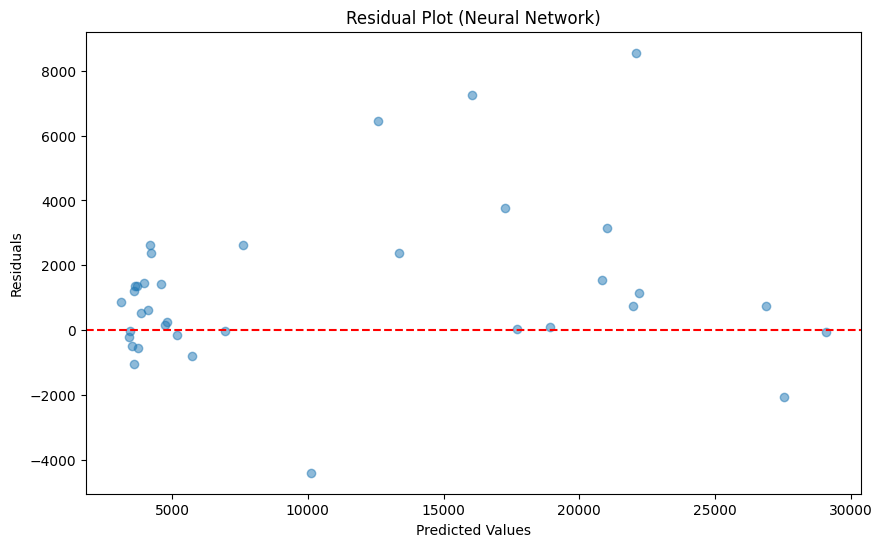

In [ ]:
# Residual Plot
residuals_nn = y_test - y_test_pred_nn.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_nn, residuals_nn, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Neural Network)')
plt.show()